In [115]:
import pandas as pd
from pathlib import Path
from prophet import Prophet

In [13]:
# Monthly cause of death by select causes 2014-2019
# Source: https://catalog.data.gov/dataset/monthly-counts-of-deaths-by-select-causes-2014-2019-da9df
# Source: https://catalog.data.gov/dataset/monthly-counts-of-deaths-by-select-causes-2020-2021-2785a
causes_2014_2019 = pd.read_csv('https://data.cdc.gov/api/views/bxq8-mugm/rows.csv?accessType=DOWNLOAD')
causes_2020_2023 = pd.read_csv('https://data.cdc.gov/api/views/9dzk-mvmi/rows.csv?accessType=DOWNLOAD')
causes_df = pd.concat([causes_2014_2019, causes_2020_2023])
causes_df.head()

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,End Date,"Nephritis, Nephrotic Syndrome and Nephrosis","Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),flag_accid,flag_mva,flag_suic,flag_homic,flag_drugod
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Causes of death other than natural cause
causes_year_df = causes_df[['Septicemia', 'Malignant Neoplasms',
       'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System',
       'Nephritis, Nephrotic Syndrome, and Nephrosis',
       'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
       'Diseases of Heart', 'Cerebrovascular Diseases',
       'Accidents (Unintentional Injuries)', 'Motor Vehicle Accidents',
       'Intentional Self-Harm (Suicide)', 'Assault (Homicide)',
       'Drug Overdose']].sum().sort_values(ascending=False)/1000000
causes_year_df

Diseases of Heart                                                                           6.414410
Malignant Neoplasms                                                                         5.833536
Accidents (Unintentional Injuries)                                                          1.649349
Chronic Lower Respiratory Diseases                                                          1.478284
Cerebrovascular Diseases                                                                    1.462112
Alzheimer Disease                                                                           1.138151
Diabetes Mellitus                                                                           0.864914
Drug Overdose                                                                               0.698109
Influenza and Pneumonia                                                                     0.501913
Intentional Self-Harm (Suicide)                                                            

<Axes: ylabel='Deaths in millions'>

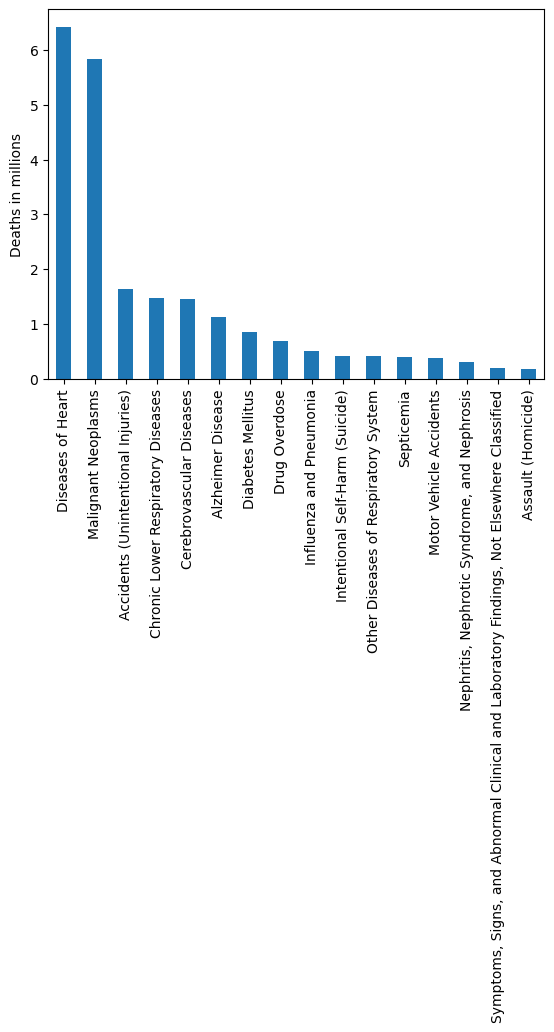

In [17]:
# Major causes of death in the US from 2014-2023
causes_year_df.plot(kind='bar', ylabel='Deaths in millions')

In [18]:
# Heart disease data by state and year
# Source: https://www.cdc.gov/nchs/pressroom/sosmap/heart_disease_mortality/heart_disease.htm
heart_path = Path('Resources/heart_disease.csv')
heart_df = pd.read_csv(heart_path)
heart_df.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,234.2,14958,/nchs/pressroom/states/alabama/al.htm
1,2022,AK,145.7,1013,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,148.5,14593,/nchs/pressroom/states/arizona/az.htm
3,2022,AR,224.1,8664,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,142.4,66340,/nchs/pressroom/states/california/ca.htm


In [19]:
# Check the data types
heart_df.dtypes

YEAR        int64
STATE      object
RATE      float64
DEATHS     object
URL        object
dtype: object

In [20]:
# Convert the 'DEATHS' column from object to int
heart_df['DEATHS'] = heart_df['DEATHS']\
                        .replace(',','',regex=True)\
                        .astype(int)
heart_df.dtypes

YEAR        int64
STATE      object
RATE      float64
DEATHS      int64
URL        object
dtype: object

In [31]:
# Group heart_df by year
heart_year_df = heart_df[['YEAR','DEATHS']].groupby('YEAR').sum()/1000
heart_year_df.head()

,DEATHS
YEAR,
2005,650.573
2014,613.024
2015,632.625
2016,633.885
2017,646.173


<Axes: xlabel='Year', ylabel='Deaths in thousands'>

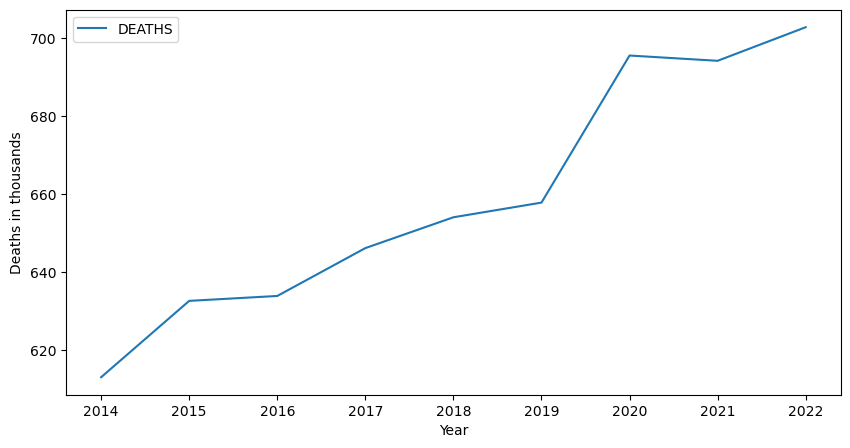

In [33]:
# Plot the deaths per year 
heart_year_df.loc['2014':'2022'].plot(figsize=(10,5), ylabel='Deaths in thousands', xlabel='Year')

In [30]:
# Set path for the files that need to be read
gdp_path = Path('Resources/gdp.csv')

# Read CSVs into DataFrames
gdp_df = pd.read_csv(gdp_path)
gdp_df.head()

,Years,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2022,2.778175e+11,6.361800e+10,4.589498e+11,1.652206e+11,3.598103e+12,4.843715e+11,3.218446e+11,8.752480e+10,1.623144e+11,...,6.757070e+10,4.757551e+11,2.355960e+12,2.481763e+11,4.061710e+10,6.493926e+11,7.255135e+11,9.558840e+10,4.017915e+11,4.743250e+10
1,2021,2.541097e+11,5.734940e+10,4.200267e+11,1.486761e+11,3.373241e+12,4.363595e+11,2.983952e+11,8.116000e+10,1.536705e+11,...,6.168470e+10,4.271255e+11,2.051769e+12,2.253403e+11,3.710380e+10,6.049576e+11,6.774895e+11,8.543420e+10,3.686113e+11,4.151020e+10
2,2020,2.308921e+11,5.047520e+10,3.820723e+11,1.339691e+11,3.020173e+12,3.912633e+11,2.762233e+11,7.581860e+10,1.447200e+11,...,5.568120e+10,3.790071e+11,1.789933e+12,2.021334e+11,3.401860e+10,5.569926e+11,6.129691e+11,7.654790e+10,3.405911e+11,3.633040e+10
3,2019,2.315619e+11,5.472820e+10,3.723935e+11,1.315783e+11,3.042694e+12,3.945347e+11,2.885363e+11,7.692370e+10,1.439908e+11,...,5.400130e+10,3.801285e+11,1.858758e+12,1.965389e+11,3.423080e+10,5.577644e+11,5.952318e+11,7.932560e+10,3.452364e+11,3.942800e+10
4,2018,2.238593e+11,5.489960e+10,3.518795e+11,1.275357e+11,2.897201e+12,3.722121e+11,2.799230e+11,7.216830e+10,1.397225e+11,...,5.229930e+10,3.630555e+11,1.809397e+12,1.844575e+11,3.306680e+10,5.329065e+11,5.643139e+11,7.919290e+10,3.324986e+11,3.917170e+10


In [56]:
heart_2018_df = heart_df.loc[heart_df['YEAR'] == 2018, ['STATE', 'RATE']].reset_index(drop=True)
heart_2018_df.head()

,STATE,RATE
0,AL,224.7
1,AK,129.7
2,AZ,136.4
3,AR,217.4
4,CA,139.7


In [85]:
gdp_2018_df = gdp_df.loc[gdp_df['Years']==2018].drop('Years',axis=1).transpose().reset_index()
gdp_2018_df.columns = ['STATE', 'GDP']
gdp_2018_df.head()

,STATE,GDP
0,Alabama,2.238593e+11
1,Alaska,5.489960e+10
2,Arizona,3.518795e+11
3,Arkansas,1.275357e+11
4,California,2.897201e+12


In [78]:
#Source: https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [89]:
gdp_2018_df['STATE'] = gdp_2018_df['STATE'].replace(us_state_to_abbrev)
gdp_2018_df.head()

,STATE,GDP
0,AL,2.238593e+11
1,AK,5.489960e+10
2,AZ,3.518795e+11
3,AR,1.275357e+11
4,CA,2.897201e+12


In [95]:
heart_gdp_df = pd.merge(heart_2018_df,gdp_2018_df,on='STATE')
heart_gdp_df.head()

,STATE,RATE,GDP
0,AL,224.7,2.238593e+11
1,AK,129.7,5.489960e+10
2,AZ,136.4,3.518795e+11
3,AR,217.4,1.275357e+11
4,CA,139.7,2.897201e+12


In [97]:
# US State population
#Source: https://www.kaggle.com/datasets/lucasvictor/us-state-populations-2018
state_pop_df = pd.read_csv('Resources/State Populations.csv')
state_pop_df.head()

,State,2018 Population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989


In [98]:
state_pop_df['State'] = state_pop_df['State'].replace(us_state_to_abbrev)
state_pop_df.head()

,State,2018 Population
0,CA,39776830
1,TX,28704330
2,FL,21312211
3,NY,19862512
4,PA,12823989


In [101]:
state_pop_df.rename(columns={'State': 'STATE', '2018 Population': 'POPULATION'}, inplace=True)
state_pop_df.head()

,STATE,POPULATION
0,CA,39776830
1,TX,28704330
2,FL,21312211
3,NY,19862512
4,PA,12823989


In [103]:
heart_gdp_pop_df = pd.merge(heart_gdp_df,state_pop_df,on='STATE')
heart_gdp_pop_df.head()

,STATE,RATE,GDP,POPULATION
0,AL,224.7,2.238593e+11,4888949
1,AK,129.7,5.489960e+10,738068
2,AZ,136.4,3.518795e+11,7123898
3,AR,217.4,1.275357e+11,3020327
4,CA,139.7,2.897201e+12,39776830


In [105]:
heart_gdp_pop_df['GDP per capita'] = heart_gdp_pop_df['GDP']/heart_gdp_pop_df['POPULATION']
heart_gdp_pop_df.head()

,STATE,RATE,GDP,POPULATION,GDP per capita
0,AL,224.7,2.238593e+11,4888949,45788.839278
1,AK,129.7,5.489960e+10,738068,74382.848193
2,AZ,136.4,3.518795e+11,7123898,49394.236133
3,AR,217.4,1.275357e+11,3020327,42225.792108
4,CA,139.7,2.897201e+12,39776830,72836.389929


In [108]:
# Correlation between death rate and GDP per capita
heart_gdp_pop_df[['RATE','GDP per capita']].corr()

,RATE,GDP per capita
RATE,1.000000,-0.536329
GDP per capita,-0.536329,1.000000


In [ ]:
# Prophet

In [183]:
prophet_df = heart_year_df.reset_index()
prophet_df

,YEAR,DEATHS
0,2005,650.573
1,2014,613.024
2,2015,632.625
3,2016,633.885
4,2017,646.173
5,2018,654.086
6,2019,657.854
7,2020,695.612
8,2021,694.259
9,2022,702.880


In [184]:
prophet_df.dtypes

YEAR        int64
DEATHS    float64
dtype: object

In [185]:
prophet_df['YEAR'] = prophet_df['YEAR'].apply(lambda x: str(x)+'-12-31')
prophet_df

,YEAR,DEATHS
0,2005-12-31,650.573
1,2014-12-31,613.024
2,2015-12-31,632.625
3,2016-12-31,633.885
4,2017-12-31,646.173
5,2018-12-31,654.086
6,2019-12-31,657.854
7,2020-12-31,695.612
8,2021-12-31,694.259
9,2022-12-31,702.880


In [186]:
prophet_df['YEAR'] = pd.to_datetime(prophet_df['YEAR'])
prophet_df.dtypes

YEAR      datetime64[ns]
DEATHS           float64
dtype: object

In [187]:
prophet_df

,YEAR,DEATHS
0,2005-12-31,650.573
1,2014-12-31,613.024
2,2015-12-31,632.625
3,2016-12-31,633.885
4,2017-12-31,646.173
5,2018-12-31,654.086
6,2019-12-31,657.854
7,2020-12-31,695.612
8,2021-12-31,694.259
9,2022-12-31,702.880


In [188]:
prophet_df.loc[prophet_df['YEAR']>'2014']

,YEAR,DEATHS
1,2014-12-31,613.024
2,2015-12-31,632.625
3,2016-12-31,633.885
4,2017-12-31,646.173
5,2018-12-31,654.086
6,2019-12-31,657.854
7,2020-12-31,695.612
8,2021-12-31,694.259
9,2022-12-31,702.880


In [189]:
prophet_df = prophet_df.loc[prophet_df['YEAR'] >= '2014']
prophet_df.columns = ['ds','y']
prophet_df

,ds,y
1,2014-12-31,613.024
2,2015-12-31,632.625
3,2016-12-31,633.885
4,2017-12-31,646.173
5,2018-12-31,654.086
6,2019-12-31,657.854
7,2020-12-31,695.612
8,2021-12-31,694.259
9,2022-12-31,702.880


In [190]:
m = Prophet()

In [191]:
m.fit(prophet_df)

12:29:11 - cmdstanpy - INFO - Chain [1] start processing
12:29:11 - cmdstanpy - INFO - Chain [1] done processing


In [198]:
future = m.make_future_dataframe(periods=25, freq='Y')
future

,ds
0,2014-12-31
1,2015-12-31
2,2016-12-31
3,2017-12-31
4,2018-12-31
5,2019-12-31
6,2020-12-31
7,2021-12-31
8,2022-12-31
9,2023-12-31


In [199]:
forecast = m.predict(future)

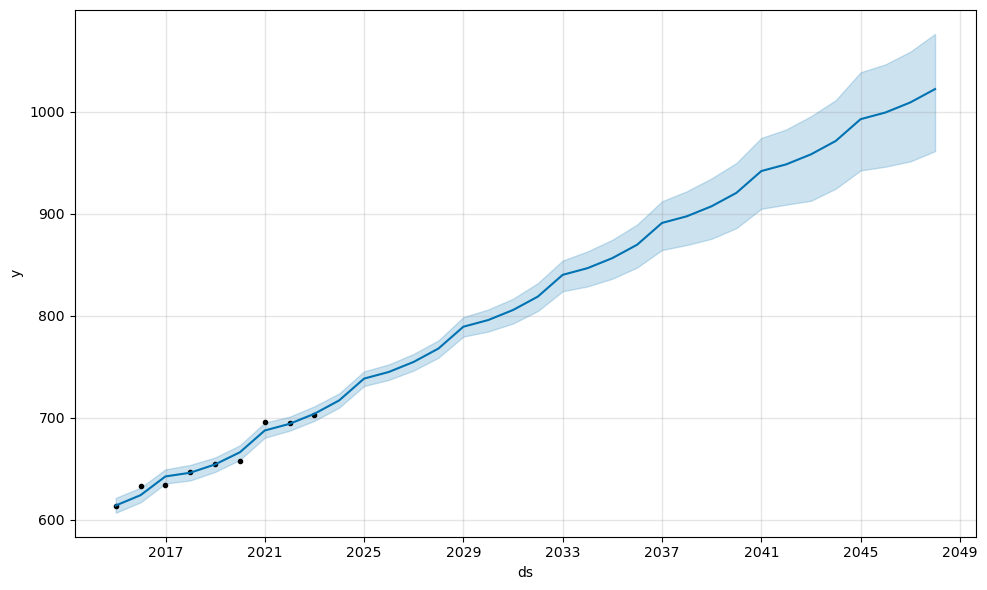

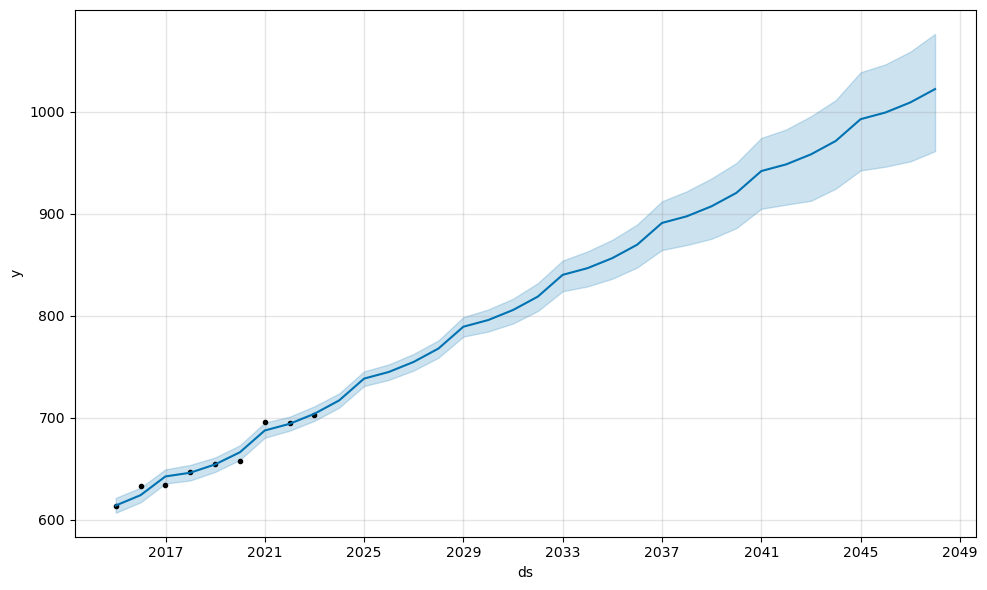

In [200]:
m.plot(forecast)

In [ ]:
# We could hit a 1,000,000 deaths a year by 2043 